# Process and analyze school data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import ast
import pyproj

/Users/phuongtruong/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_school = pd.read_csv("data/schools.csv", sep=';')
df_school['Geom'] = df_school['Geom'].apply(ast.literal_eval)
df_school['LAT'] = df_school['Geom'].str['coordinates'].str[1]
df_school['LON'] = df_school['Geom'].str['coordinates'].str[0]
df_school.drop(['Geom'], axis=1, inplace=True)
df_school.rename(columns={'Geo Local Area': 'NEIGHBOURHOOD'}, inplace=True)
df_school

,ADDRESS,SCHOOL_CATEGORY,SCHOOL_NAME,NEIGHBOURHOOD,LAT,LON
0,688 W Hastings St,Independent School,Alexander Academy,Downtown,49.285001,-123.114010
1,5025 Willow St,Public School,BC Children's Adol. Psych. Unit,South Cambie,49.239631,-123.125791
2,1001 Cotton Drive,Public School,Britannia Community Secondary,Grandview-Woodland,49.275236,-123.071923
3,3340 E 54th Av,Public School,Captain James Cook Elementary,Killarney,49.219381,-123.035829
4,3340 E 54th Av,StrongStart BC,Captain James Cook StrongStart Centre,Killarney,49.219381,-123.035829
...,...,...,...,...,...,...
189,1580 W Broadway,Public School,Vancouver Alternate,Fairview,49.263300,-123.140261
190,530 E 41st Av,Public School,Vancouver Learning Network,Sunset,49.231957,-123.092798
191,998 W 26th Av,Independent School,Vancouver Talmud Torah Elementary,South Cambie,49.247580,-123.126822
192,15 N Renfrew St,Independent School,West Coast Christian School,Hastings-Sunrise,49.284984,-123.044536


In [3]:
df_school.isna().sum()

ADDRESS            0
SCHOOL_CATEGORY    0
SCHOOL_NAME        0
NEIGHBOURHOOD      0
LAT                0
LON                0
dtype: int64

### Add rating to school

In [4]:
df_score = pd.read_csv("data/school-ranking.csv")
df_score

,School Name,SCORE
0,Britannia,4.5
1,David Thompson,7.1
2,Eric Hamber,6.8
3,Gladstone,5.0
4,John Oliver,5.2
...,...,...
103,Dr H N MacCorkindale,6.5
104,Florence Nightingale,3.4
105,General Wolfe,4.2
106,Lord Selkirk,5.2


In [5]:
drop_values = ['StrongStart', 'Program', 'Annex', 'Montessori', 'BC', 'Prg', 'SD 39', 'International',
              'Alternate', 'Network', 'Institute', 'DL']
df_school = df_school[~df_school['SCHOOL_NAME'].str.contains('|'.join(drop_values))]
df_school['SCHOOL_NAME'] = df_school['SCHOOL_NAME'].str.replace(' Community', '')

/Users/phuongtruong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
df_secondary = df_school[df_school["SCHOOL_NAME"].str.contains("Secondary")]
df_high = df_school[df_school['SCHOOL_NAME'].str.contains("High School")]
df_academy = df_school[df_school['SCHOOL_NAME'].str.contains("Academy")]
df_college = df_school[df_school['SCHOOL_NAME'].str.contains("College")]
df_elementary = df_school[(~df_school.isin(df_secondary))&(~df_school.isin(df_high))&(~df_school.isin(df_academy))&(~df_school.isin(df_college))].dropna()

In [7]:
# Secondary school
df_secondary['School Name'] = df_secondary['SCHOOL_NAME'].str.replace(' Secondary', '')
df_secondary = pd.merge(df_secondary, df_score, how="left", on=["School Name"])
df_secondary.drop(columns=['School Name'], inplace=True)
df_secondary.dropna(inplace=True)
df_secondary

/Users/phuongtruong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ADDRESS,SCHOOL_CATEGORY,SCHOOL_NAME,NEIGHBOURHOOD,LAT,LON,SCORE
0,1001 Cotton Drive,Public School,Britannia Secondary,Grandview-Woodland,49.275236,-123.071923,4.5
1,1755 E 55th Av,Public School,David Thompson Secondary,Victoria-Fraserview,49.220439,-123.070632,7.1
2,1755 Barclay St,Public School,King George Secondary,West End,49.289824,-123.136445,4.7
3,419 E 24th Av,Public School,Sir Charles Tupper Secondary,Riley Park,49.249754,-123.094809,5.4
4,7055 Heather St,Public School,Sir Winston Churchill Secondary,Oakridge,49.221060,-123.125615,5.9
5,115 E 11th Av,Independent School,St Patrick Regional Secondary,Mount Pleasant,49.261405,-123.102604,5.3
6,4105 Gladstone St,Public School,Gladstone Secondary,Kensington-Cedar Cottage,49.247612,-123.061633,5.0
7,530 E 41st Av,Public School,John Oliver Secondary,Sunset,49.231957,-123.092798,5.2
8,2550 W 10th Av,Public School,Kitsilano Secondary,Kitsilano,49.262655,-123.163589,6.6
9,3939 W 16th Av,Public School,Lord Byng Secondary,West Point Grey,49.259567,-123.192531,8.4


In [8]:
# High school
df_high['School Name'] = df_high['SCHOOL_NAME'].str.replace(' High School', '')
df_high = pd.merge(df_high, df_score, how="left", on=["School Name"])
df_high.drop(columns=['School Name'], inplace=True)
df_high.dropna(inplace=True)
df_high

/Users/phuongtruong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ADDRESS,SCHOOL_CATEGORY,SCHOOL_NAME,NEIGHBOURHOOD,LAT,LON,SCORE
0,5718 Willow St,Independent School,King David High School,Oakridge,49.233448,-123.122791,8.7


In [9]:
df_academy['School Name'] = df_academy['SCHOOL_NAME'].str.replace(' Academy', '')
df_academy = pd.merge(df_academy, df_score, how="left", on=["School Name"])
df_academy.drop(columns=['School Name'], inplace=True)
df_academy.dropna(inplace=True)
df_academy

/Users/phuongtruong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ADDRESS,SCHOOL_CATEGORY,SCHOOL_NAME,NEIGHBOURHOOD,LAT,LON,SCORE
2,4195 Alexandra St,Independent School,Little Flower Academy,Shaughnessy,49.248431,-123.142261,10.0
5,4125 W 8th Av,Independent School,West Point Grey Academy,West Point Grey,49.267066,-123.201507,10.0


In [10]:
df_college['School Name'] = df_college['SCHOOL_NAME']
df_college = pd.merge(df_college, df_score, how="left", on=["School Name"])
df_college.drop(columns=['School Name'], inplace=True)
df_college.dropna(inplace=True)
df_college

/Users/phuongtruong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ADDRESS,SCHOOL_CATEGORY,SCHOOL_NAME,NEIGHBOURHOOD,LAT,LON,SCORE
0,5400 Cartier St,Independent School,Vancouver College,Shaughnessy,49.234959,-123.136171,10.0


In [11]:
df_elementary['School Name'] = df_elementary['SCHOOL_NAME'].str.replace(' Elementary', '')
df_elementary['School Name'] = df_elementary['School Name'].str.replace(' School', '')
df_elementary = pd.merge(df_elementary, df_score, how="left", on=["School Name"])
df_elementary.drop(columns=['School Name'], inplace=True)
df_elementary.dropna(inplace=True)
df_elementary

,ADDRESS,SCHOOL_CATEGORY,SCHOOL_NAME,NEIGHBOURHOOD,LAT,LON,SCORE
0,3340 E 54th Av,Public School,Captain James Cook Elementary,Killarney,49.219381,-123.035829,6.1
3,6350 Tisdall St,Public School,Dr Annie B Jamieson Elementary,Oakridge,49.226907,-123.121004,8.1
4,3050 Crown St,Public School,Ecole Jules Quesnel Elementary,West Point Grey,49.259568,-123.192538,7.1
5,150 Drake St,Public School,Elsie Roy Elementary,Downtown,49.272238,-123.122482,6.4
7,2330 E 37th Av,Public School,G T Cunningham Elementary,Renfrew-Collingwood,49.236732,-123.057456,5.2
...,...,...,...,...,...,...,...
100,3000 Commercial Drive,Independent School,Stratford Hall,Kensington-Cedar Cottage,49.257469,-123.069463,9.1
101,1850 E 41st Av,Public School,Tecumseh Elementary,Victoria-Fraserview,49.232056,-123.068004,6.6
102,788 Beatty St,Independent School,The Westside School,Downtown,49.277571,-123.113444,4.5
103,4170 Trafalgar St,Public School,Trafalgar Elementary,Arbutus-Ridge,49.250179,-123.164606,6.1


In [12]:
df_school = pd.concat([df_elementary, df_secondary, df_high, df_academy, df_college], ignore_index=True)
df_school

,ADDRESS,SCHOOL_CATEGORY,SCHOOL_NAME,NEIGHBOURHOOD,LAT,LON,SCORE
0,3340 E 54th Av,Public School,Captain James Cook Elementary,Killarney,49.219381,-123.035829,6.1
1,6350 Tisdall St,Public School,Dr Annie B Jamieson Elementary,Oakridge,49.226907,-123.121004,8.1
2,3050 Crown St,Public School,Ecole Jules Quesnel Elementary,West Point Grey,49.259568,-123.192538,7.1
3,150 Drake St,Public School,Elsie Roy Elementary,Downtown,49.272238,-123.122482,6.4
4,2330 E 37th Av,Public School,G T Cunningham Elementary,Renfrew-Collingwood,49.236732,-123.057456,5.2
...,...,...,...,...,...,...,...
104,2250 Eddington Drive,Public School,Prince of Wales Secondary,Arbutus-Ridge,49.244983,-123.159536,6.3
105,5718 Willow St,Independent School,King David High School,Oakridge,49.233448,-123.122791,8.7
106,4195 Alexandra St,Independent School,Little Flower Academy,Shaughnessy,49.248431,-123.142261,10.0
107,4125 W 8th Av,Independent School,West Point Grey Academy,West Point Grey,49.267066,-123.201507,10.0


In [13]:
# Type of school
df_school.groupby('SCHOOL_CATEGORY').count()

,ADDRESS,SCHOOL_NAME,NEIGHBOURHOOD,LAT,LON,SCORE
SCHOOL_CATEGORY,,,,,,
Independent School,29,29,29,29,29,29
Public School,80,80,80,80,80,80


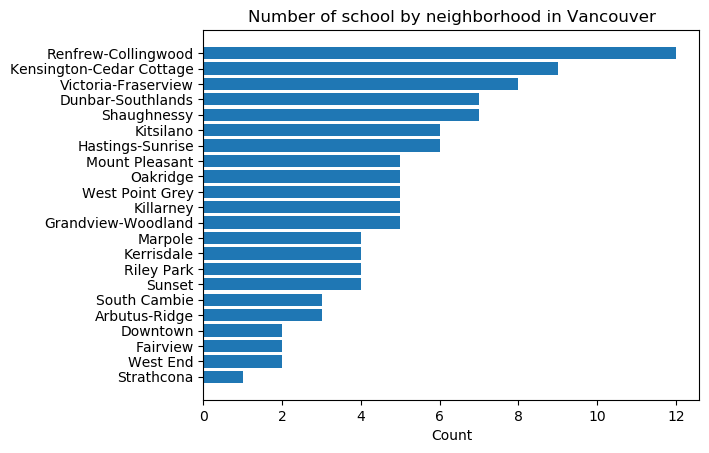

In [14]:
# Plot number of school by neighborhood
df1 = df_school.groupby('NEIGHBOURHOOD')['ADDRESS'].count().sort_values(ascending=False).reset_index(name='COUNT')
plt.rcdefaults()
fig, ax = plt.subplots()

x_axis = df1['NEIGHBOURHOOD']
y_axis = df1['COUNT']
y_pos = np.arange(len(x_axis))

ax.barh(y_pos, y_axis, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(x_axis)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Number of school by neighborhood in Vancouver')

plt.show()

### Add school data to crime data

In [21]:
# Convert UTM to latitude and longitude
def xy_to_lonlat(x, y):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=10, datum='WGS84')
    lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
    return lonlat[0], lonlat[1]

# Reference year based on census data
def reference_year(year):
    if year < 2011:
        return 2003
    else:
        if year < 2016:
            return 2013
        else:
            return 2016

df_crime = pd.read_csv("census_data/crime_record_district.csv", index_col=[0])        
df_crime['REF_YEAR'] = df_crime.apply(lambda row: reference_year(row['YEAR']), axis=1)
lon, lat = xy_to_lonlat(df_crime['X'], df_crime['Y'])
df_crime['LAT'] = lat.tolist()
df_crime['LON'] = lon.tolist()
df_crime = df_crime.dropna()
df_crime.drop(['X','Y'], axis=1, inplace=True)
df_crime.head()

/Users/phuongtruong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  """


,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,GEO_NAME,REF_YEAR,LAT,LON
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,Vancouver Granville,2016,49.266678,-123.129029
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,Vancouver Centre,2016,49.285255,-123.123649
3,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,Vancouver Centre,2013,49.285181,-123.123536
4,Break and Enter Commercial,2005,11,14,3,9,10XX ALBERNI ST,West End,Vancouver Centre,2003,49.285132,-123.123461
5,Break and Enter Commercial,2006,5,21,4,50,10XX ALBERNI ST,West End,Vancouver Centre,2003,49.285132,-123.123461


#### Find the closest school and distance from the closest school to the crime location 

In [22]:
# !pip install haversine
from scipy.spatial.distance import cdist
import haversine as hs
from haversine import Unit

def closest_distance(loc1, loc2):
    return hs.haversine(loc1, loc2, unit=Unit.METERS)

def closest_point(point, points):
    return points[cdist([point], points).argmin()]

df_school['POINT'] = [(x, y) for x,y in zip(df_school['LAT'], df_school['LON'])]
df_crime['POINT'] = [(x, y) for x,y in zip(df_crime['LAT'], df_crime['LON'])]
df_crime['CLOSEST_POINT'] = [closest_point(point, list(df_school['POINT'])) for point in df_crime['POINT']]
df_crime['D_SCHOOL'] = df_crime.apply(lambda x : closest_distance(x['POINT'], x['CLOSEST_POINT']), axis=1)
df_crime = df_crime.merge(df_school[['POINT','SCHOOL_NAME','SCORE']].rename(columns={'POINT':'CLOSEST_POINT'}))
df_crime.rename(columns={'SCHOOL_NAME':'CLOSEST_SCHOOL', 'SCORE':'SCHOOL_SCORE'}, inplace=True)
df_crime.drop(['POINT','CLOSEST_POINT'], axis=1, inplace=True)
df_crime

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,GEO_NAME,REF_YEAR,LAT,LON,D_SCHOOL,CLOSEST_SCHOOL,SCHOOL_SCORE
0,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,Vancouver Granville,2016,49.266678,-123.129029,779.657216,Elsie Roy Elementary,6.4
1,Break and Enter Commercial,2013,4,19,7,43,10XX BARCLAY ST,West End,Vancouver Centre,2013,49.282901,-123.126558,1221.974992,Elsie Roy Elementary,6.4
2,Break and Enter Commercial,2014,12,31,20,0,10XX BARCLAY ST,West End,Vancouver Centre,2013,49.282786,-123.126215,1203.742734,Elsie Roy Elementary,6.4
3,Break and Enter Commercial,2017,8,24,3,59,10XX BARCLAY ST,West End,Vancouver Centre,2016,49.282661,-123.126206,1190.086741,Elsie Roy Elementary,6.4
4,Break and Enter Commercial,2015,2,13,2,32,10XX BARCLAY ST,West End,Vancouver Centre,2013,49.282762,-123.126178,1200.494511,Elsie Roy Elementary,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559878,Vehicle Collision or Pedestrian Struck (with I...,2003,11,19,17,35,W 41ST AVE / WILLOW ST,Oakridge,Vancouver South,2003,49.233763,-123.123888,87.002489,King David High School,8.7
559879,Vehicle Collision or Pedestrian Struck (with I...,2010,8,4,17,15,W 41ST AVE / WILLOW ST,South Cambie,Vancouver Centre,2003,49.233862,-123.123875,91.134276,King David High School,8.7
559880,Vehicle Collision or Pedestrian Struck (with I...,2004,4,19,13,5,W 42ND AVE / CAMBIE ST,Oakridge,Vancouver South,2003,49.232530,-123.116083,497.656899,King David High School,8.7
559881,Vehicle Collision or Pedestrian Struck (with I...,2004,6,6,14,56,W 42ND AVE / CAMBIE ST,Oakridge,Vancouver South,2003,49.232530,-123.116083,497.656899,King David High School,8.7


In [27]:
df_crime.groupby('TYPE').mean()[['D_SCHOOL', 'SCHOOL_SCORE']].reset_index()

,TYPE,D_SCHOOL,SCHOOL_SCORE
0,Break and Enter Commercial,578.249881,5.897569
1,Break and Enter Residential/Other,473.907376,6.424120
2,Mischief,538.651750,5.820523
3,Other Theft,585.650252,6.132288
4,Theft from Vehicle,569.383300,5.866134
5,Theft of Bicycle,573.573371,5.978495
6,Theft of Vehicle,503.034148,6.214123
7,Vehicle Collision or Pedestrian Struck (with F...,552.570787,5.935417
8,Vehicle Collision or Pedestrian Struck (with I...,549.175024,6.169110


Most crime types occur within ~500 meters distance from a school, with an average school rating around 6

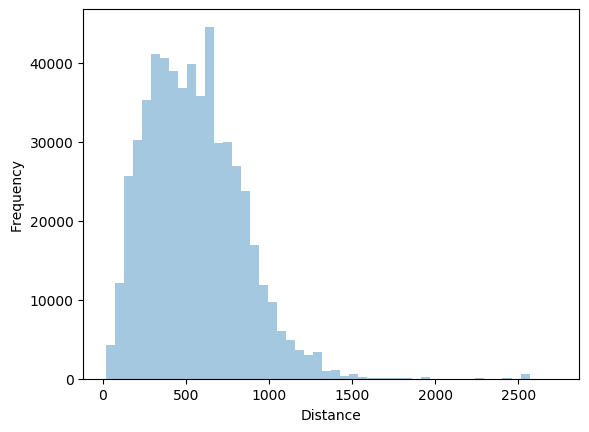

In [28]:
# Plot histogram of distance from nearest school
ax = sns.distplot(df_crime['D_SCHOOL'], kde=False)
ax.set_xlabel('Distance')
ax.set_ylabel('Frequency')
plt.show()

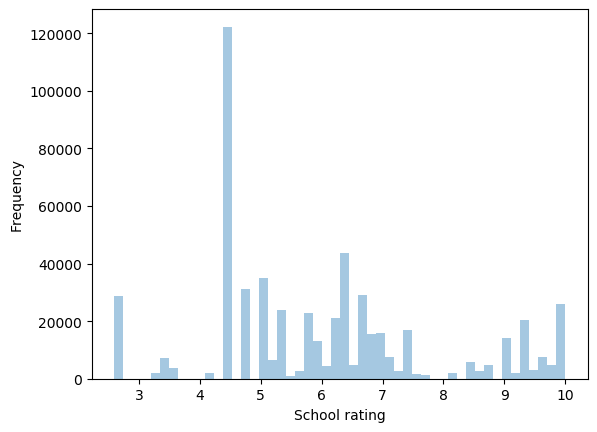

In [29]:
# Plot histogram of school's rating
ax = sns.distplot(df_crime['SCHOOL_SCORE'], kde=False)
ax.set_xlabel('School rating')
ax.set_ylabel('Frequency')
plt.show()

In [90]:
# Rename Downtown, Arbutus-Ridge in crime data
# df_crime['NEIGHBOURHOOD'] = df_crime['NEIGHBOURHOOD'].str.replace('Central Business District', 'Downtown')
# df_crime['NEIGHBOURHOOD'] = df_crime['NEIGHBOURHOOD'].str.replace('Arbutus Ridge', 'Arbutus-Ridge')

In [36]:
df_census = pd.read_csv("data/census_data.csv", index_col=[0])
df_census.rename(columns={'YEAR':'REF_YEAR'}, inplace=True)
df_census.drop(['GEO_CODE'], axis=1, inplace=True)
df_census

,REF_YEAR,GEO_NAME,POPULATION_DENSITY,POPULATION_PERCENTAGE_CHANGE,POP_TOTAL,POP_MALE,POP_FEMALE,CHILDREN_TOTAL,CHILDREN_MALE,CHILDREN_FEMALE,...,YOUTH_FEMALE,ADULT_TOTAL,ADULT_MALE,ADULT_FEMALE,SENIOR_TOTAL,SENIOR_MALE,SENIOR_FEMALE,HOUSEHOLD_INCOME,EMPLOYMENT_RATE,UNEMPLOYMENT_RATE
0,2016,Vancouver Centre,10466.500000,13.6,116445.0,59980.0,56460.0,6970.0,3575.0,3400.0,...,5005.0,84545.0,44410.0,40135.0,15520.0,7595.0,7925.0,70080.0,70.4,5.2
1,2016,Vancouver East,5374.700000,5.1,115725.0,58375.0,57345.0,12310.0,6345.0,5970.0,...,5415.0,76585.0,39180.0,37400.0,16230.0,7670.0,8560.0,54245.0,65.8,5.8
2,2016,Vancouver Granville,4620.300000,3.6,103455.0,48295.0,55165.0,11500.0,6035.0,5455.0,...,6245.0,63710.0,29620.0,34090.0,16375.0,7005.0,9370.0,48325.0,63.7,5.3
3,2016,Vancouver Kingsway,6854.600000,2.8,104870.0,50985.0,53885.0,14165.0,7350.0,6810.0,...,6610.0,61565.0,29705.0,31855.0,15540.0,6940.0,8605.0,38115.0,63.0,5.8
4,2016,Vancouver Quadra,2617.600000,3.1,105610.0,49780.0,55825.0,14210.0,7315.0,6895.0,...,8940.0,56465.0,26165.0,30300.0,17415.0,7720.0,9695.0,44740.0,57.2,6.6
5,2016,Vancouver South,4973.400000,1.9,102925.0,49495.0,53430.0,14015.0,7365.0,6650.0,...,6965.0,56315.0,26715.0,29605.0,18295.0,8080.0,10210.0,34995.0,59.0,5.8
6,2013,Vancouver Centre,9206.648697,13.6,102470.0,53000.0,49480.0,5795.0,2955.0,2835.0,...,5675.0,81300.0,42965.0,38330.0,11260.0,5475.0,5785.0,62040.0,69.0,6.2
7,2013,Vancouver East,5113.794705,5.1,110100.0,56025.0,54070.0,12205.0,6305.0,5905.0,...,5755.0,80515.0,41905.0,38620.0,14500.0,6765.0,7735.0,50065.0,63.3,8.6
8,2013,Vancouver Granville,4457.570344,3.6,99805.0,46495.0,53310.0,11445.0,5855.0,5590.0,...,6015.0,70485.0,32505.0,37965.0,13400.0,5685.0,7705.0,46315.0,63.8,5.7
9,2013,Vancouver Kingsway,6666.993464,2.8,102005.0,49725.0,52280.0,14810.0,7620.0,7185.0,...,6510.0,67545.0,32510.0,35020.0,13700.0,6135.0,7560.0,35765.0,60.1,7.3


In [68]:
# Final dataframe for machine learning model
df_final = pd.merge(df_crime, df_census, how="left", on=["GEO_NAME","REF_YEAR"])
df_final.drop(['HUNDRED_BLOCK','NEIGHBOURHOOD','REF_YEAR','CLOSEST_SCHOOL'], axis=1, inplace=True)
df_final

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,GEO_NAME,LAT,LON,D_SCHOOL,...,YOUTH_FEMALE,ADULT_TOTAL,ADULT_MALE,ADULT_FEMALE,SENIOR_TOTAL,SENIOR_MALE,SENIOR_FEMALE,HOUSEHOLD_INCOME,EMPLOYMENT_RATE,UNEMPLOYMENT_RATE
0,Break and Enter Commercial,2019,3,7,2,6,Vancouver Granville,49.266678,-123.129029,779.657216,...,6245.0,63710.0,29620.0,34090.0,16375.0,7005.0,9370.0,48325.0,63.7,5.3
1,Break and Enter Commercial,2013,4,19,7,43,Vancouver Centre,49.282901,-123.126558,1221.974992,...,5675.0,81300.0,42965.0,38330.0,11260.0,5475.0,5785.0,62040.0,69.0,6.2
2,Break and Enter Commercial,2014,12,31,20,0,Vancouver Centre,49.282786,-123.126215,1203.742734,...,5675.0,81300.0,42965.0,38330.0,11260.0,5475.0,5785.0,62040.0,69.0,6.2
3,Break and Enter Commercial,2017,8,24,3,59,Vancouver Centre,49.282661,-123.126206,1190.086741,...,5005.0,84545.0,44410.0,40135.0,15520.0,7595.0,7925.0,70080.0,70.4,5.2
4,Break and Enter Commercial,2015,2,13,2,32,Vancouver Centre,49.282762,-123.126178,1200.494511,...,5675.0,81300.0,42965.0,38330.0,11260.0,5475.0,5785.0,62040.0,69.0,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559878,Vehicle Collision or Pedestrian Struck (with I...,2003,11,19,17,35,Vancouver South,49.233763,-123.123888,87.002489,...,8410.0,79230.0,37360.0,41855.0,19000.0,8225.0,10765.0,42430.0,56.1,8.2
559879,Vehicle Collision or Pedestrian Struck (with I...,2010,8,4,17,15,Vancouver Centre,49.233862,-123.123875,91.134276,...,7220.0,109020.0,55535.0,53465.0,15365.0,7005.0,8340.0,82775.0,70.5,6.0
559880,Vehicle Collision or Pedestrian Struck (with I...,2004,4,19,13,5,Vancouver South,49.232530,-123.116083,497.656899,...,8410.0,79230.0,37360.0,41855.0,19000.0,8225.0,10765.0,42430.0,56.1,8.2
559881,Vehicle Collision or Pedestrian Struck (with I...,2004,6,6,14,56,Vancouver South,49.232530,-123.116083,497.656899,...,8410.0,79230.0,37360.0,41855.0,19000.0,8225.0,10765.0,42430.0,56.1,8.2


In [70]:
# Save final data
df_final.to_csv("crime-final.csv", index=False)